In [1]:
import numpy as np
import gym
import os
from time import time
import time as tm
import scipy.stats as sp
import matplotlib.pyplot as plt
from subprocess import call
from datetime import datetime

In [2]:
env = gym.make('CartPole-v0')

In [3]:
def softmax(state,theta):
    a = np.matmul(state,theta)
    return np.exp(a)/np.sum(np.exp(a))

def policy(softmax_probs):
    distw = sp.rv_discrete(name='distw',values=([0,1], softmax_probs))
    return distw.rvs()

def grads(action,softmax_probs):
    s = softmax_probs
    if action == 0:
        return np.array([1-s[0],-s[1]])[None,:]
    else:
        return np.array([-s[0],1-s[1]])[None,:]

In [27]:
def plot_rewards(R,n_episodes,alpha,y):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plt.plot(range(len(R)),R)
    plt.title('Episodes: {} | Av. reward: {:.1f}$\pm${:.1f} | $\\alpha$: {} | $\gamma$: {}'.format(n_episodes,np.mean(R),np.std(R),alpha,y))
    plt.subplot(1,2,2)
    plt.title('Total reward: {:.0f}'.format(np.sum(R)))
    plt.plot(range(len(R)),np.cumsum(R))
    
#     time_appendix = datetime.now().strftime("%Y-%m-%d-%H-%M-%ss")
#     plt.savefig('cartpole_rewards_{}.png'.format(time_appendix))

In [49]:
def get_episode(n_episodes,alpha,y,theta=None):
    exists = os.path.isfile('solved_cartpole.npy')
    if exists:
        theta = np.load('solved_cartpole.npy')
    else:
        theta = np.random.rand(env.observation_space.shape[0],env.action_space.n)

    R = []
    for i in range(n_episodes):
        state = env.reset()
        rewards = []
        while True:
            #env.render()
            #tm.sleep(0.01) # descomente para visualizar mais devagar
            s = softmax(state,theta)
            action = policy(s)
            next_state, reward, done, _ = env.step(action)

            rewards.append(reward)
            grad = grads(action,s)
            theta += alpha*np.array(np.dot(state[None,:].T,grad)*reward*y)
            state = next_state    
            if done: 
                break
        R.append(sum(rewards))
    np.save("solved_cartpole", theta)
    return R

In [62]:
%%time
n_episodes,alpha,y = [5000,0.5,0.99]
R = get_episode(n_episodes,alpha,y)

CPU times: user 24 s, sys: 0 ns, total: 24 s
Wall time: 23.9 s


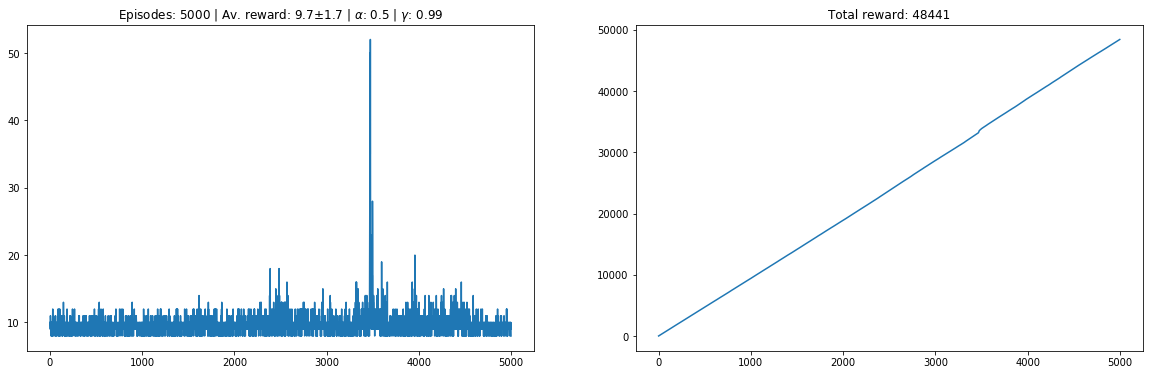

In [63]:
plot_rewards(R,n_episodes,alpha,y)

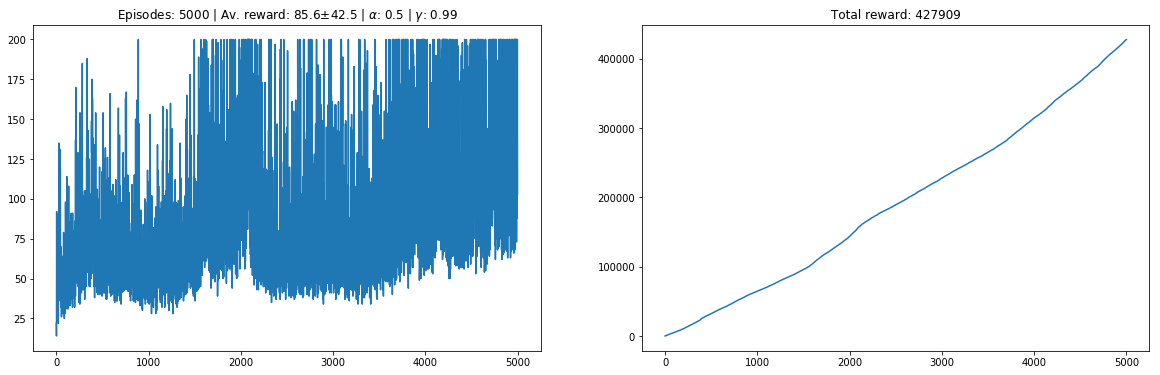

In [48]:
plot_rewards(R,n_episodes,alpha,y)

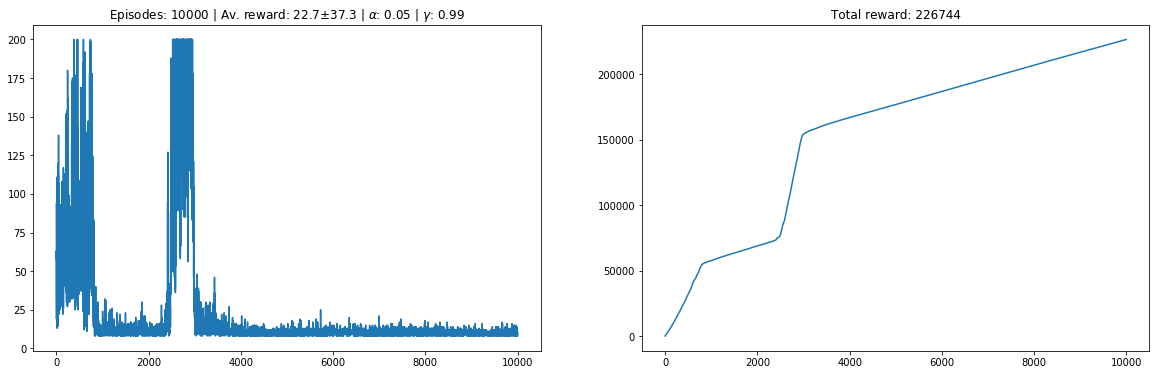

In [37]:
plot_rewards(R,n_episodes,alpha,y)

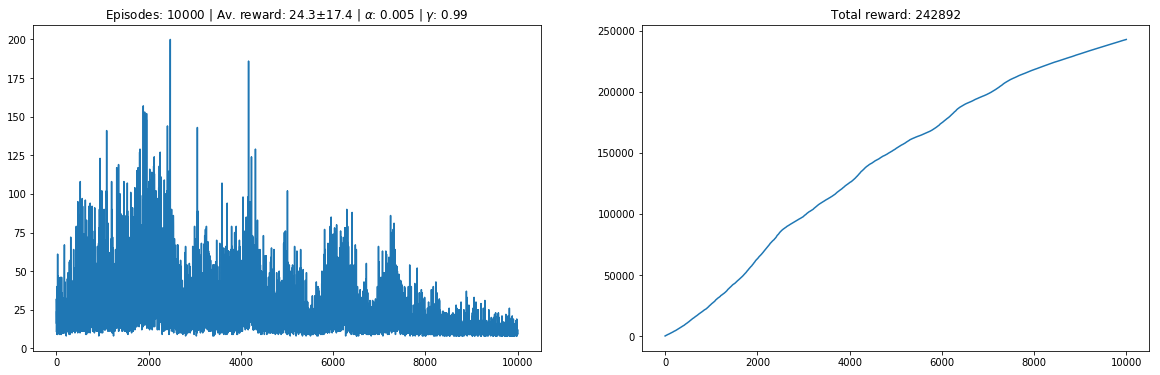

In [35]:
plot_rewards(R,n_episodes,alpha,y)

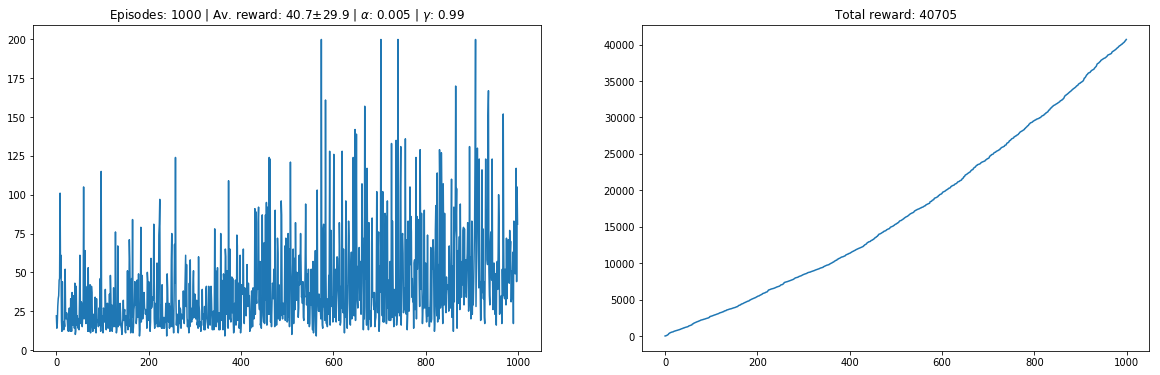

In [29]:
plot_rewards(R,n_episodes,alpha,y)

In [1]:
def env_play(n_episodes,alpha,y):
    R = []
    episode_length = []
    theta = np.random.rand(env.observation_space.shape[0],env.action_space.n)
    for i in range(n_episodes):
        episode = get_episode(theta)
        states = [item[0] for item in episode]
        rewards = [item[1] for item in episode]
        actions = [item[2] for item in episode]
        softs = [item[3] for item in episode]
        R.append(sum(rewards))
        episode_length.append(len(episode))
        grad = [grads(i,s) for i,s in zip(actions,softs)]
        
        for t in range(len(grad)):
            theta += alpha*np.array(np.dot(states[t][None,:].T,grad[t])*sum([r*(y**j) for j,r in enumerate(rewards[t:])]))
        
        print('Step back, I am doing some math...')
        print("Episode: {} | Last reward: {:.2f} |  Mean reward: {:.1f}| Episode length: {}".format(i,R[-1],np.mean(R[-100:]),len(episode)))
        print("="*80)
        if np.mean(R[-100:]) > 195:
            print("Solved!!!!!!!!!!!!!!!!!!!!!!!!")
            print("Episode: {} | Mean reward: {:.1f}+-{:.1f}".format(i,np.mean(R[-100:]),np.std(R[-100:])))
            break
    return R,i,theta

In [ ]:
n_episodes_max, alpha, y = [1000,0.005,0.9999]

R,n_episodes,theta = env_play(n_episodes_max,alpha,y)
env.close()
plot_rewards(R,n_episodes,alpha,y)
print(theta)
print('Finito!')